In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_loan=pd.read_csv("loan.csv")
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df_loan.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df_loan.shape

(614, 13)

In [8]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df_loan.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

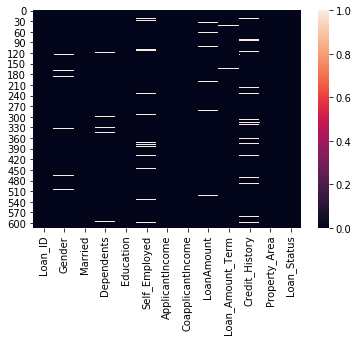

In [11]:
sns.heatmap(df_loan.isnull())

In [12]:
df_loan['Gender'].fillna(method='ffill',inplace=True)

In [13]:
df_loan['Dependents'].fillna(method='ffill',inplace=True)

In [14]:
df_loan['Self_Employed'].fillna(method='ffill',inplace=True)
df_loan['LoanAmount'].fillna(method='ffill',inplace=True)
df_loan['Loan_Amount_Term'].fillna(method='ffill',inplace=True)
df_loan['Credit_History'].fillna(method='ffill',inplace=True)

In [15]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df_loan['Married'].fillna(method='ffill',inplace=True)

In [17]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

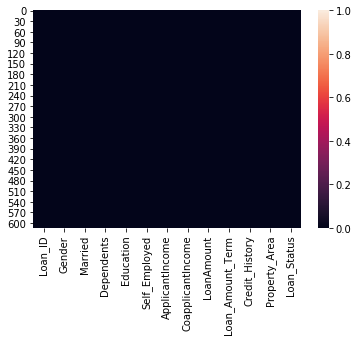

In [20]:
sns.heatmap(df_loan.isnull())

In [21]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
df_loan.shape

(614, 13)

In [28]:
df_loan['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
9      349.0
10      70.0
11     109.0
12     200.0
13     114.0
14      17.0
15     125.0
16     100.0
17      76.0
18     133.0
19     115.0
20     104.0
21     315.0
22     116.0
23     112.0
24     151.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
       ...  
584    146.0
585    172.0
586    104.0
587     70.0
588     94.0
589    106.0
590     56.0
591    205.0
592    292.0
593    142.0
594    260.0
595    110.0
596    187.0
597     88.0
598    180.0
599    192.0
600    350.0
601    155.0
602    128.0
603    172.0
604    496.0
605    496.0
606    173.0
607    157.0
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [29]:
df_loan['LoanAmount'] = df_loan['LoanAmount'].replace(np.nan, 0)

In [30]:
df_loan['LoanAmount']

0        0.0
1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
9      349.0
10      70.0
11     109.0
12     200.0
13     114.0
14      17.0
15     125.0
16     100.0
17      76.0
18     133.0
19     115.0
20     104.0
21     315.0
22     116.0
23     112.0
24     151.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
       ...  
584    146.0
585    172.0
586    104.0
587     70.0
588     94.0
589    106.0
590     56.0
591    205.0
592    292.0
593    142.0
594    260.0
595    110.0
596    187.0
597     88.0
598    180.0
599    192.0
600    350.0
601    155.0
602    128.0
603    172.0
604    496.0
605    496.0
606    173.0
607    157.0
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [31]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

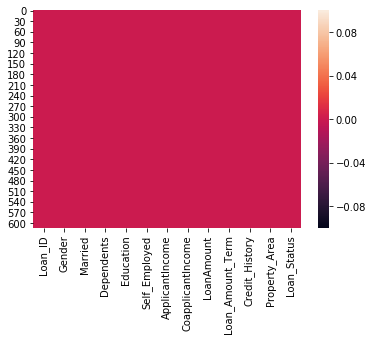

In [32]:
sns.heatmap(df_loan.isnull())

In [33]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

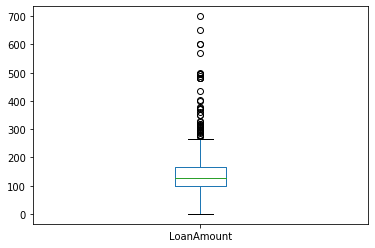

In [36]:
df_loan['LoanAmount'].plot.box()

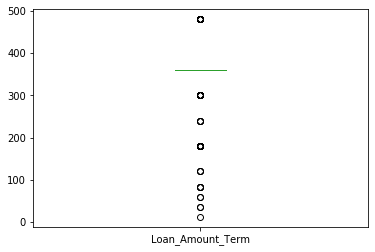

In [38]:
df_loan['Loan_Amount_Term'].plot.box()

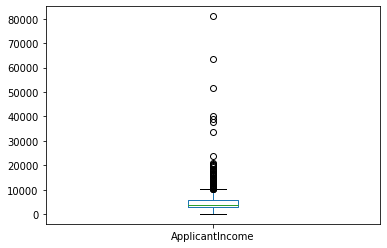

In [39]:
df_loan['ApplicantIncome'].plot.box()

In [44]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [46]:
df_loan.Loan_ID.unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [47]:
df_loan1=df_loan.drop("Loan_ID",axis=1)
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
df_loan1.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Gender"]=le.fit_transform(df_loan1["Gender"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
df_loan1.Married.unique()

array(['No', 'Yes'], dtype=object)

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Married"]=le.fit_transform(df_loan1["Married"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [52]:
df_loan1.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Education"]=le.fit_transform(df_loan1["Education"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
df_loan1.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Self_Employed"]=le.fit_transform(df_loan1["Self_Employed"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
df_loan1.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [59]:
df_loan1.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Loan_Status"]=le.fit_transform(df_loan1["Loan_Status"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [61]:
df_loan1.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int64
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [62]:
df_loan1.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [63]:
df_loan1.shape

(614, 12)

In [64]:
df_loan1=df_loan1[df_loan1.Dependents != '3+']

In [65]:
df_loan1.shape

(563, 12)

In [169]:
print('3+' in df_loan1.Dependents)

False


In [68]:
df_loan1.Dependents.unique()

array(['0', '1', '2'], dtype=object)

In [69]:
df_loan1.Dependents=df_loan1.Dependents.astype('int')

In [70]:
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [71]:
df_loan1.shape

(563, 12)

In [72]:
df_loan1.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int64
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [73]:
dummies=pd.get_dummies(df_loan1.Property_Area)
dummies.head()

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [74]:
merged=pd.concat([df_loan1,dummies],axis='columns')
merged.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,Urban,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,1


In [76]:
final=merged.drop(['Property_Area'],axis='columns')
final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,1,0,0,1
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,1,0,0,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,0,0,1,0
10,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,1,0,0,1


In [77]:
final.shape

(563, 14)

In [78]:
final.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Rural',
       'Semiurban', 'Urban'],
      dtype='object')

In [79]:
final.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int64
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int32
Rural                  uint8
Semiurban              uint8
Urban                  uint8
dtype: object

In [80]:
final.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
Gender,1.000000,0.358215,0.149952,0.046637,0.005613,0.040201,0.167278,0.121402,-0.083276,-0.004777,0.009729,0.083835,-0.132864,0.056227
Married,0.358215,1.000000,0.339035,0.006795,0.000490,0.023899,0.141120,0.153181,-0.094057,0.022993,0.095858,-0.006559,-0.005208,0.011625
Dependents,0.149952,0.339035,1.000000,0.025591,0.064573,0.018810,-0.001619,0.067788,-0.048296,-0.045536,0.019748,-0.053898,0.010256,0.041042
Education,0.046637,0.006795,0.025591,1.000000,-0.021269,-0.144741,-0.047155,-0.131857,-0.069206,-0.085720,-0.077406,0.095985,-0.054015,-0.036375
Self_Employed,0.005613,0.000490,0.064573,-0.021269,1.000000,0.184341,-0.009805,0.124646,-0.035545,-0.021189,-0.017534,0.038576,-0.009365,-0.027295
ApplicantIncome,0.040201,0.023899,0.018810,-0.144741,0.184341,1.000000,-0.117556,0.490949,-0.029225,0.038655,-0.002225,-0.026878,0.009230,0.016240
CoapplicantIncome,0.167278,0.141120,-0.001619,-0.047155,-0.009805,-0.117556,1.000000,0.173960,-0.036529,0.021249,-0.011829,0.032571,-0.031533,0.001217
LoanAmount,0.121402,0.153181,0.067788,-0.131857,0.124646,0.490949,0.173960,1.000000,0.051170,0.016692,-0.044319,0.041230,-0.012414,-0.026703
Loan_Amount_Term,-0.083276,-0.094057,-0.048296,-0.069206,-0.035545,-0.029225,-0.036529,0.051170,1.000000,-0.045444,-0.051894,0.029356,0.032127,-0.061083
Credit_History,-0.004777,0.022993,-0.045536,-0.085720,-0.021189,0.038655,0.021249,0.016692,-0.045444,1.000000,0.532001,-0.059786,0.056937,-0.001264


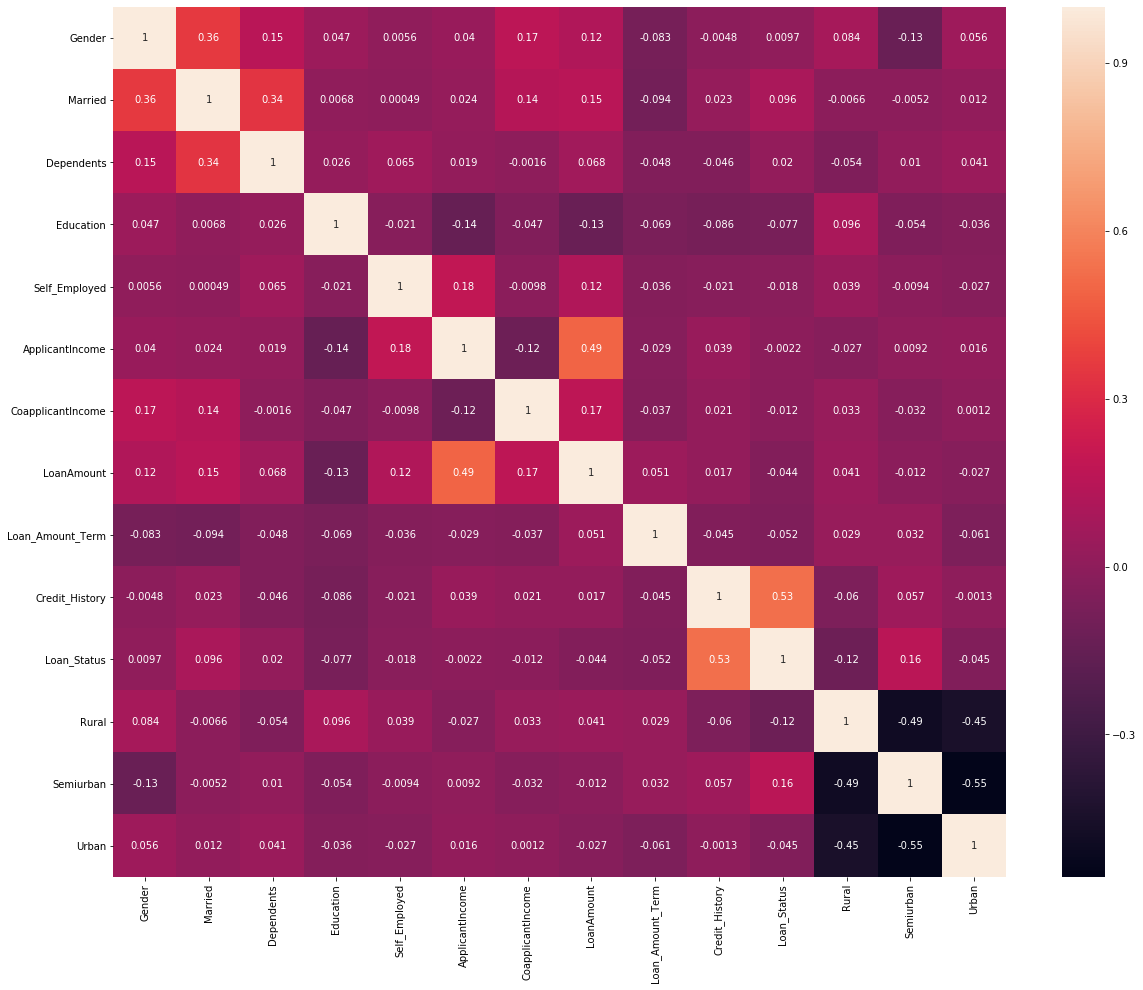

In [82]:
corr_hmap=final.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

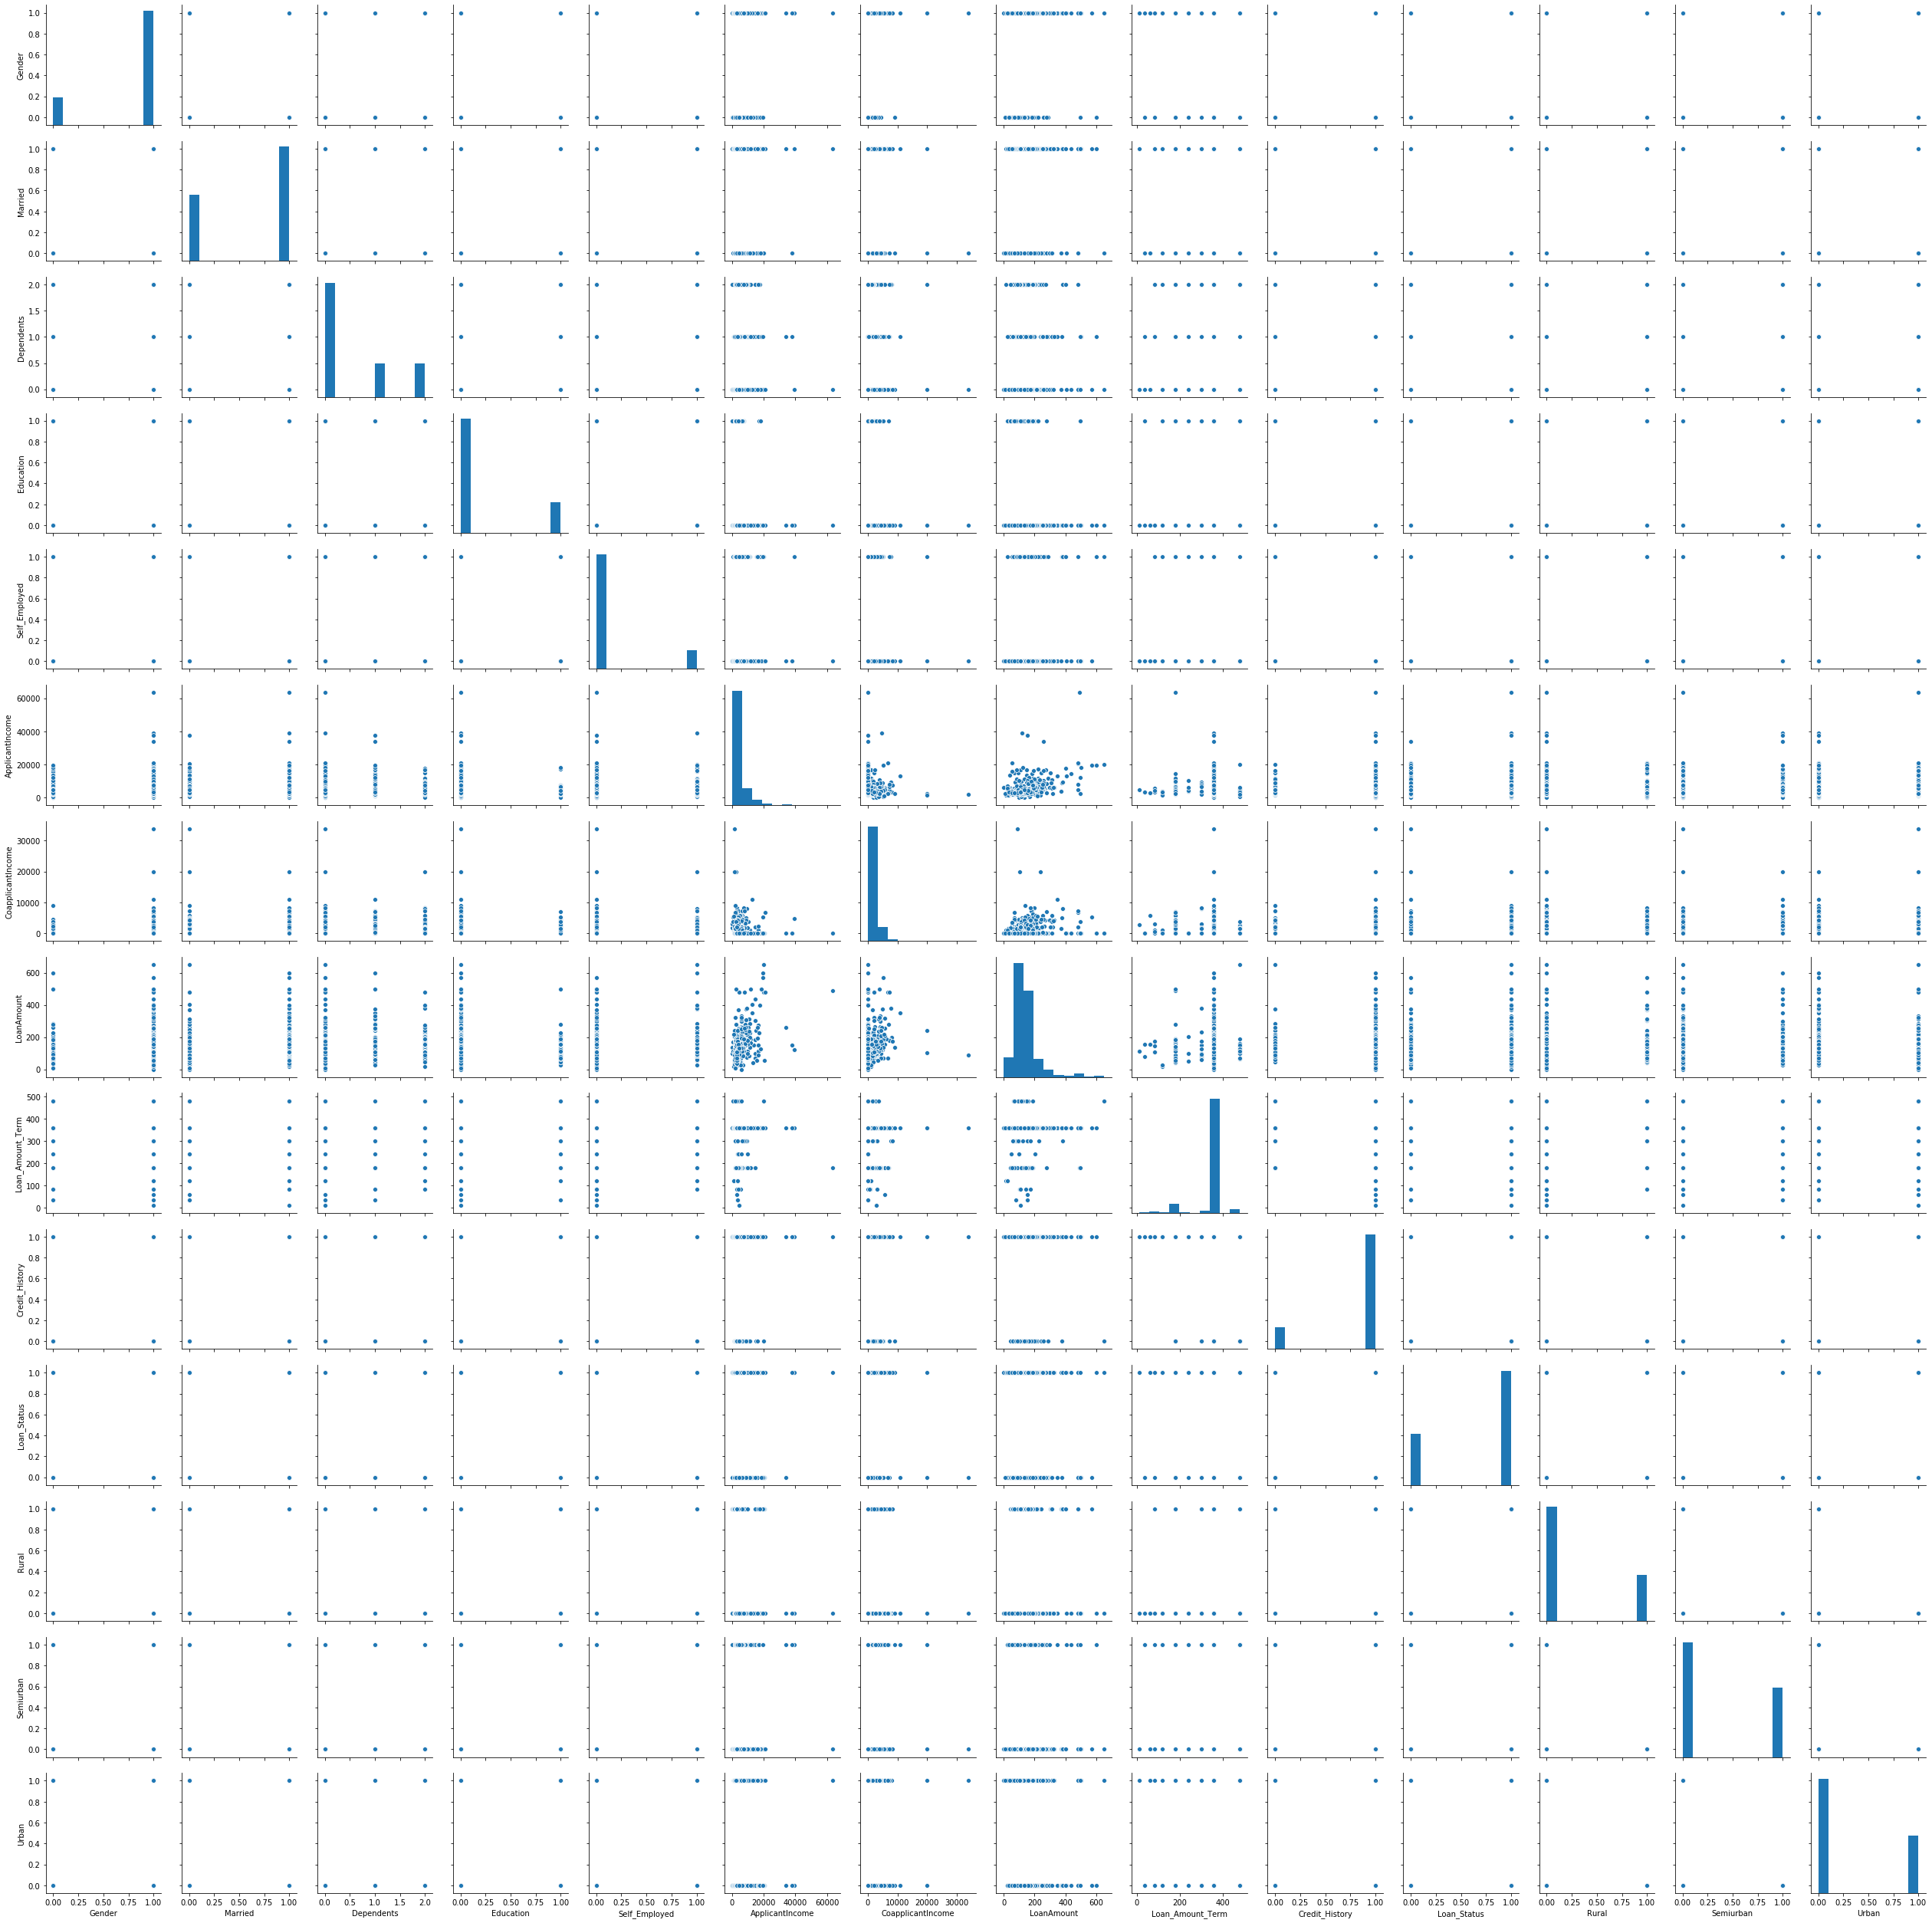

In [83]:
sns.pairplot(final)

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(final))

In [85]:
z

array([[0.49277338, 1.31141403, 0.70850222, ..., 0.63284873, 0.78010988,
        1.40671105],
       [0.49277338, 0.76253569, 0.56183775, ..., 1.58015645, 0.78010988,
        0.71087804],
       [0.49277338, 0.76253569, 0.70850222, ..., 0.63284873, 0.78010988,
        1.40671105],
       ...,
       [0.49277338, 0.76253569, 0.56183775, ..., 0.63284873, 0.78010988,
        1.40671105],
       [0.49277338, 0.76253569, 1.83217772, ..., 0.63284873, 0.78010988,
        1.40671105],
       [2.02933039, 1.31141403, 0.70850222, ..., 0.63284873, 1.2818707 ,
        0.71087804]])

In [86]:
threshold=3
print(np.where(z>3))

(array([  8,  13,  86, 113, 120, 120, 123, 168, 170, 223, 240, 255, 261,
       284, 284, 289, 307, 307, 338, 338, 368, 382, 397, 407, 447, 455,
       457, 466, 466, 481, 482, 483, 502, 516, 528, 534, 538, 554, 555],
      dtype=int64), array([6, 8, 8, 6, 5, 7, 8, 5, 5, 8, 8, 7, 5, 5, 7, 8, 5, 7, 5, 7, 6, 6,
       7, 5, 7, 8, 8, 5, 7, 7, 7, 7, 8, 7, 8, 6, 8, 7, 7], dtype=int64))


In [87]:
final1=final[(z<3).all(axis=1)]

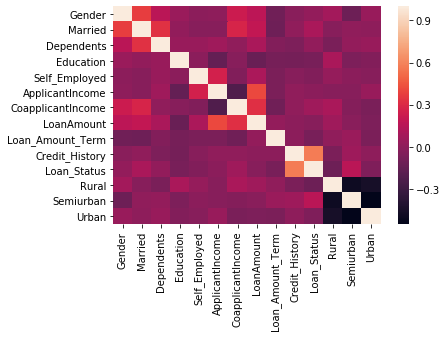

In [89]:
sns.heatmap(final1.corr())

In [90]:
final1.skew()

Gender              -1.516168
Married             -0.546208
Dependents           0.971086
Education            1.360776
Self_Employed        2.152203
ApplicantIncome      2.091974
CoapplicantIncome    1.234600
LoanAmount           1.139288
Loan_Amount_Term    -2.037386
Credit_History      -1.815481
Loan_Status         -0.852840
Rural                0.922254
Semiurban            0.529378
Urban                0.694091
dtype: float64

In [98]:
lm=LinearRegression()

In [99]:
x=final1.drop('Loan_Status',axis='columns')
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,1


In [100]:
y=final1.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
8      1
10     1
11     1
12     1
13     0
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
      ..
576    0
577    1
578    1
579    1
580    1
582    1
583    0
584    0
586    1
587    1
588    1
589    0
590    1
591    0
593    1
594    1
595    1
596    0
597    0
598    1
599    1
601    1
603    1
606    1
607    1
608    1
609    1
611    1
612    1
613    0
Name: Loan_Status, Length: 529, dtype: int32

In [102]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
x.shape

(529, 13)

In [105]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,1


In [106]:
#predict with give input
t=np.array([1,0,0,0,0,5849,0.0,0.0,360.0,1.0,0,0,1])

In [108]:
t.shape

(13,)

In [109]:
t=t.reshape(1,-1)

In [110]:
lm.predict(t)

array([0.78579559])

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(34,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=21,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is",max_r_score)

r2_score corresponding to random state: 34 is 0.06935093583615781
r2_score corresponding to random state: 35 is 0.5088704976455402
r2_score corresponding to random state: 36 is 0.6665270204837768
r2_score corresponding to random state: 37 is 0.7146508965071245
r2_score corresponding to random state: 38 is 0.3295442775435147
r2_score corresponding to random state: 39 is -0.5100303863974145
r2_score corresponding to random state: 40 is 0.3910444633089486
r2_score corresponding to random state: 41 is 0.7229990245280764
r2_score corresponding to random state: 42 is 0.39418885988316954
r2_score corresponding to random state: 43 is -0.14387278408468585
r2_score corresponding to random state: 44 is -0.5842911779037923
r2_score corresponding to random state: 45 is 0.3731177866279196
r2_score corresponding to random state: 46 is 0.28800638960221614
r2_score corresponding to random state: 47 is 0.16978932522846157
r2_score corresponding to random state: 48 is 0.6706429066899641
r2_score correspo

In [164]:
lm.intercept_

0.2846306593935626

In [165]:
pred=lm.predict(x_test)
print('predicted result',pred)
print('actual price',y_test)

predicted result [ 0.85434191  0.79253542  0.86227695  0.74307606  0.91718991 -0.00538297
  1.02128016  0.78827591  0.02982862  0.83531163  0.84691571  0.79840247
  0.66601583  0.71598168  0.78026244  0.02828896  0.85781067  0.07004722
  0.89871026 -0.02366634  0.80470266]
actual price 521    1
21     1
483    1
508    1
217    1
254    0
182    1
243    1
353    0
588    1
132    1
418    1
473    1
272    1
551    1
532    0
245    0
550    0
488    1
280    0
372    1
Name: Loan_Status, dtype: int32


In [166]:
print('error')

print('mean absolute error',mean_absolute_error(y_test,pred))


print('mean squared error',mean_squared_error(y_test,pred))


print('root mean absolute error',np.sqrt(mean_squared_error(y_test,pred)))




error
mean absolute error 0.17772886187623765
mean squared error 0.06307111333771978
root mean absolute error 0.2511396291661668


In [167]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.690951544645173


In [168]:
from sklearn.externals import joblib
joblib.dump(lm,"sbilifeinsurance")

['sbilifeinsurance']